# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 10

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash;  15 баллов
* Задача 2 &mdash;  40 баллов

<b><font color="orange">Cложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash;  50 баллов
* Задача 4 &mdash;  40 баллов





-----

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, LabelEncoder)


---
## Задача 1

Перед обучением линейной регрессии вы могли совершать некоторые преобразования над признаками. Какие преобразования стоит совершить перед обучением решающего дерева?

В частности, ответьте на вопрос, имеет ли смысл примененять следующие преобразования:
* монотонные функции от одного признака;
* немонотонные функции от одного признака;
* линейные функции от нескольких признаков;
* нелинейные функции от нескольких признаков;
* стандартизация признаков;
* преобразования категориальных признаков.

Например, вместо/дополнительно с признаком $x_j$ рассматривать признак $f(x_j)$, для указанных выше типов функций.

- В монотонных функциях необходимости нет, binary decision tree принимает решение о сплите, исходя из 


- нелинейные функции 


## Задача 2

### 1. Загрузка и предобработка данных.




Скачайте [данные](https://www.kaggle.com/datasets/sayansh001/crystal-structure-classification) по классификации кристаллических решеток. Целевой переменной в этой задаче является `Lowest distortion`. С сырыми данными и более подробным описанием задачи можно ознакомиться также [здесь](https://www.kaggle.com/datasets/sayansh001/crystal-structure-classification).


In [24]:
data = pd.read_csv('Crystal_structure.csv')


Сделаем предобработку данных.

In [25]:
# уберем признаки, которые нам не нужны (подробнее можете почиать во вкладке 'Code' на странице датасета)
data = data.drop(["In literature", "Compound", "τ"], axis=1)
# убираем объекты, для которых неизвестен таргет
data = data.drop(data[data["Lowest distortion"] == "-"].index).reset_index(drop=True)
# закодируем целевую переменную числами
data['Lowest distortion'] = LabelEncoder().fit_transform(data['Lowest distortion'])
# закодируем категориальные признаки числами
data['A'] = LabelEncoder().fit_transform(data['A'])
data['B'] = LabelEncoder().fit_transform(data['B'])
# обработаем пропуски
for i in data.columns:
    column = data[i]
    for k in range(len(column)):
        if column[k] == '-':
            column[k] = 0
    data[i] = column


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### 2. Обучение модели


Создайте массив признаков и массив таргета.

In [26]:
X = data.drop(['Lowest distortion'],axis=1)
y = data['Lowest distortion']


Обучите модель решающего дерева.

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

clf = DecisionTreeClassifier(max_depth=5)

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

Сделайте предсказание для тестовой выборки.

In [28]:
y_pred = clf.predict(X_test)

Создайте массив, показывающий успех или не успех модели (1 если модель угадала класс, 0 если не угадала).

In [29]:
results = y_pred == y_test

Вы получили выборку из распределения $Bern(\theta)$. Постройте доверительный интервал для $\theta$.

In [30]:
# бустрэп
theta = np.random.choice(results, (len(results),10000), replace=True).mean(axis=1)
print(f'Среднее: {theta.mean()}, доверительный интервал: ({np.percentile(theta,5)}, {np.percentile(theta,95)})')

Среднее: 0.7005900682335101, доверительный интервал: (0.6931, 0.7082)


Повторите все шаги для случайного леса. Сравните полученные интервалы.

In [31]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

results = y_pred == y_test

theta = np.random.choice(results, (len(results),10000), replace=True).mean(axis=1)
print(f'Среднее: {theta.mean()}, доверительный интервал: ({np.percentile(theta,5)}, {np.percentile(theta,95)})')

Среднее: 0.7824515542077333, доверительный интервал: (0.7758, 0.78931)


**Выводы:** 
random forest имеет статзначимый прирост в метрике accuracy по сравнению с decision tree

## Задача 3

Рассмотрим данные из <a href='https://miptstats.github.io/courses/ad_mipt/hw8.html' target="_blank">предыдущего домашнего задания</a>. Скачайте данные и разделите их на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1.

Выполните необходимые преобразования признаков.

*Замечание.* Если в валидационной и/или тестовой частях есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать, но в то же время выбросы вносят существенный вклад в значение метрики.   

In [32]:
from sklearn.datasets import load_diabetes


data = load_diabetes()

In [33]:
X, y = [pd.DataFrame(data[feat]) for feat in ['data','target']]

<AxesSubplot: >

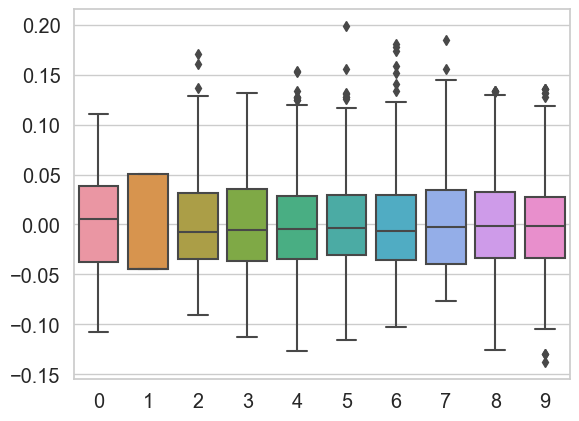

In [34]:
sns.boxplot(X)

In [35]:
import seaborn as sns 

# исключили выбросы
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
mask = ~((X < (Q1 - 1.5 * IQR)) |(X > (Q3 + 1.5 * IQR))).any(axis=1)
X,y = X[mask], y[mask]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

Обучите решающее дерево глубины 3 и визуализируйте его. 

*Рекомендуется сделать скриншот визуализации и прислать его в бот вместе с ноутбуком.*

4294.623601570343

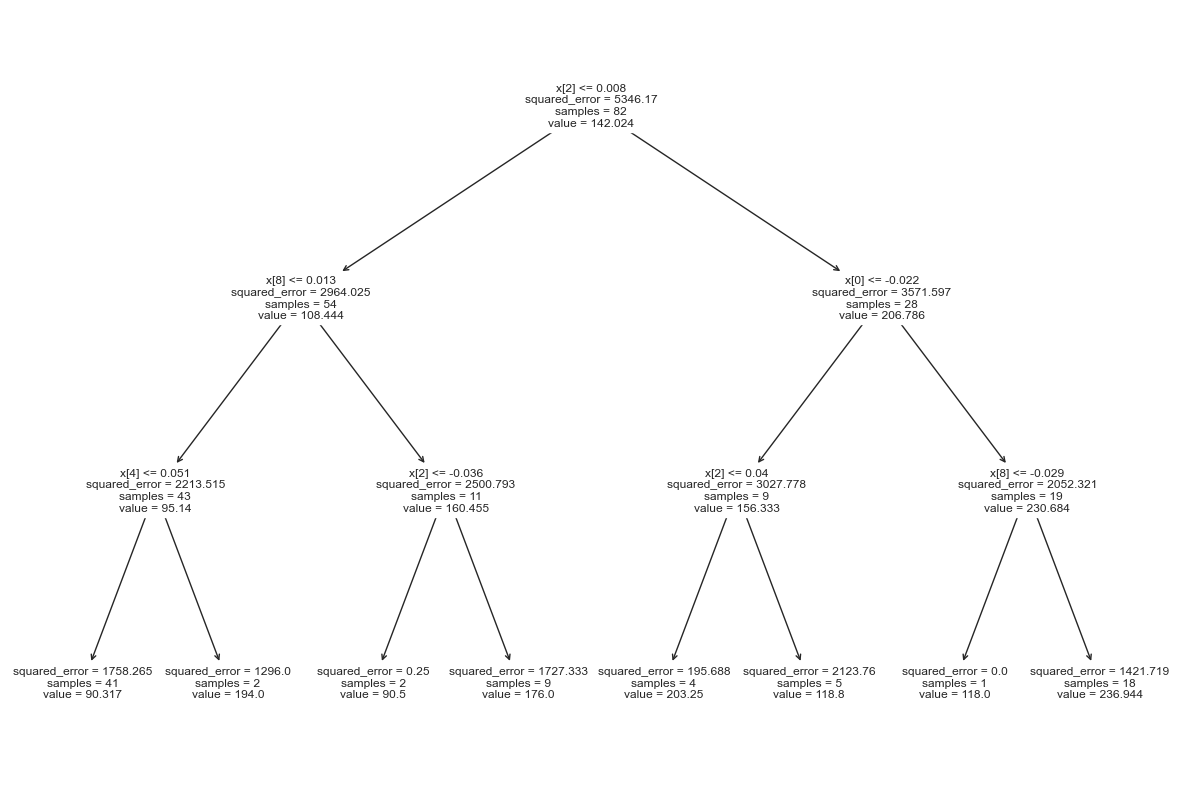

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, plot_tree

clf = DecisionTreeRegressor(max_depth=3)

clf.fit(X_train, y_train)

y_test_predict = clf.predict(X_test)

plt.figure(figsize=(15, 10))
plot_tree(clf)
plt.plot()
mean_squared_error(y_test_predict, y_test)

Подберите оптимальное значение максимальной глубины дерева. Для этого обучите решающие деревья с выставленным значением соответствующего гиперпараметра и посчитайте ошибку предсказаний каждого из них на валидационной выборке. Постройте соответствующий график.

In [38]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


def objective(trial):
    max_depth = trial.suggest_int("tree_max_depth", 2, 16)
    #splitter = trial.suggest_categorical("splitter",['best','random'])
   
    dtr_model = DecisionTreeRegressor(
        max_depth = max_depth,
        #splitter = splitter,
        random_state = 42)
    score = cross_val_score(dtr_model, X_train, y_train, scoring='neg_mean_squared_error', cv=3).mean()
    return score


study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials =16 )
trial = study.best_trial
print("Best Score: ", trial.value)
print("Best Params: ")
for key, value in trial.params.items():
    print("  {}: {}".format(key, value))
optuna.visualization.plot_slice(study, ['tree_max_depth'])

[I 2023-05-13 16:17:37,076] A new study created in memory with name: no-name-9a104d51-9931-41b4-945c-d7562a82fae3
[I 2023-05-13 16:17:37,096] Trial 0 finished with value: -6405.09463143858 and parameters: {'tree_max_depth': 5}. Best is trial 0 with value: -6405.09463143858.
[I 2023-05-13 16:17:37,110] Trial 1 finished with value: -4622.25125922399 and parameters: {'tree_max_depth': 2}. Best is trial 1 with value: -4622.25125922399.
[I 2023-05-13 16:17:37,126] Trial 2 finished with value: -6254.496795185838 and parameters: {'tree_max_depth': 6}. Best is trial 1 with value: -4622.25125922399.
[I 2023-05-13 16:17:37,151] Trial 3 finished with value: -4622.25125922399 and parameters: {'tree_max_depth': 2}. Best is trial 1 with value: -4622.25125922399.
[I 2023-05-13 16:17:37,171] Trial 4 finished with value: -6568.793981481482 and parameters: {'tree_max_depth': 11}. Best is trial 1 with value: -4622.25125922399.
[I 2023-05-13 16:17:37,188] Trial 5 finished with value: -6734.467675896932 an

Best Score:  -4622.25125922399
Best Params: 
  tree_max_depth: 2


Аналогичным образом подберите минимальное число объектов в листе, зафиксировав при этом подобранное значение максимальной глубины.

In [39]:
import optuna
from sklearn.model_selection import cross_val_score


def objective(trial):
    max_depth = trial.suggest_int("max_depth", 2, 4)
    #splitter = trial.suggest_categorical("splitter",['best','random'])
    min_samples_leaf=trial.suggest_int("min_samples_leaf", 2, 30)
   
    dtr_model = DecisionTreeRegressor(
        max_depth = max_depth,
        #splitter = splitter,
        min_samples_leaf = min_samples_leaf,
        random_state = 42)
    score = cross_val_score(dtr_model, X_train, y_train, scoring='neg_mean_squared_error', cv=3).mean()
    return score


study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials =120)
trial = study.best_trial
print("Best Score: ", trial.value)
print("Best Params: ")
for key, value in trial.params.items():
    print("  {}: {}".format(key, value))
optuna.visualization.plot_contour(study)

[I 2023-05-13 16:17:37,427] A new study created in memory with name: no-name-3e0280d5-a648-4f1d-8a36-a3976f82c0e9
[I 2023-05-13 16:17:37,445] Trial 0 finished with value: -4549.210297531321 and parameters: {'max_depth': 2, 'min_samples_leaf': 22}. Best is trial 0 with value: -4549.210297531321.
[I 2023-05-13 16:17:37,461] Trial 1 finished with value: -4573.261348918718 and parameters: {'max_depth': 2, 'min_samples_leaf': 3}. Best is trial 0 with value: -4549.210297531321.
[I 2023-05-13 16:17:37,479] Trial 2 finished with value: -4607.6749215317495 and parameters: {'max_depth': 3, 'min_samples_leaf': 5}. Best is trial 0 with value: -4549.210297531321.
[I 2023-05-13 16:17:37,499] Trial 3 finished with value: -4573.261348918718 and parameters: {'max_depth': 2, 'min_samples_leaf': 4}. Best is trial 0 with value: -4549.210297531321.
[I 2023-05-13 16:17:37,515] Trial 4 finished with value: -4549.210297531321 and parameters: {'max_depth': 2, 'min_samples_leaf': 26}. Best is trial 0 with value

Best Score:  -4193.19923982848
Best Params: 
  max_depth: 3
  min_samples_leaf: 17


Визуализируйте дерево при оптимальных гиперпараметрах и посчитайте его ошибку на тестовой части выборки.

[]

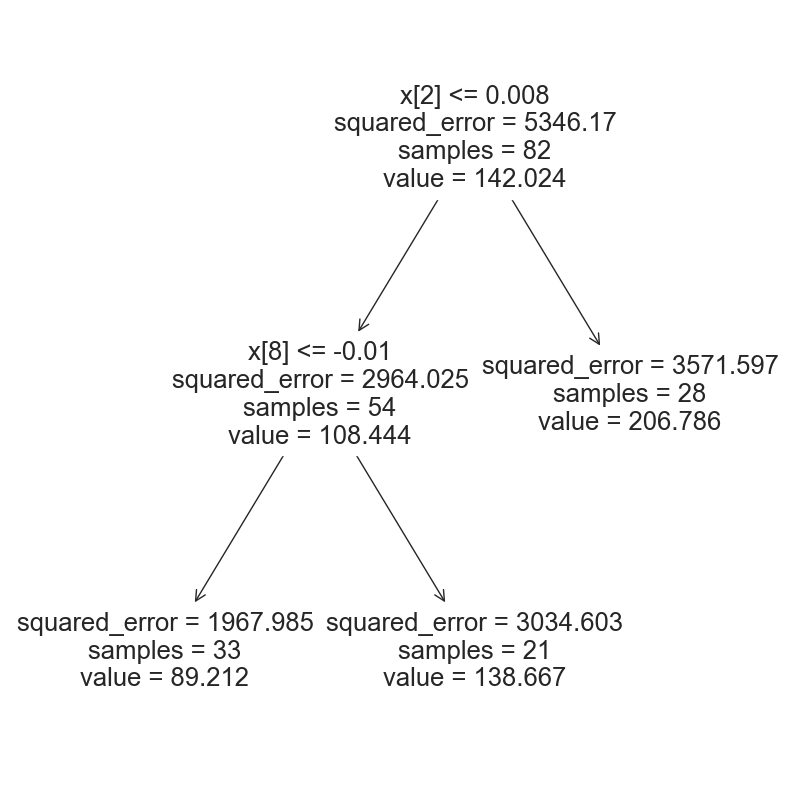

In [40]:
best_clf = DecisionTreeRegressor(**trial.params)
best_clf.fit(X_train, y_train)
mean_squared_error(best_clf.predict(X_test), y_test)

plt.figure(figsize=(10,10))
plot_tree(best_clf)
plt.plot()

Решающее дерево позволяет оценить *важность признаков* &mdash; некоторая величина, зависящая от того
* насколько часто тот или иной признак использовался при разбиении листа, 
* и насколько сильно при этом изменился критерий информативности.

У обученной модели значения важности признаков лежат в поле `feature_importances_`. Визуализируйте их с помощью `seaborn.barplot`.

<BarContainer object of 10 artists>

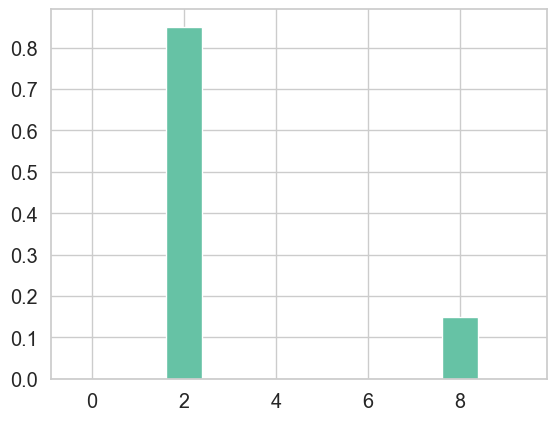

In [41]:
plt.bar(x=range(X.shape[1]),height=best_clf.feature_importances_)

Сделайте выводы.

**Вывод:** в индустрии постепенно уходят от feature importance бустинга и random forest. В отличие от весов при логистической регрессии feature importance не отражает, какое внимание будет уделять признаку при его возрастании. Один из трендов - вектора Шэппели, пришедшие из кооперативной теории игр. Вектор позволяет оценить вклад в принятие решение каждого признака. Дополнительным преимуществом является совместный вклад признаков в выводы модели.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


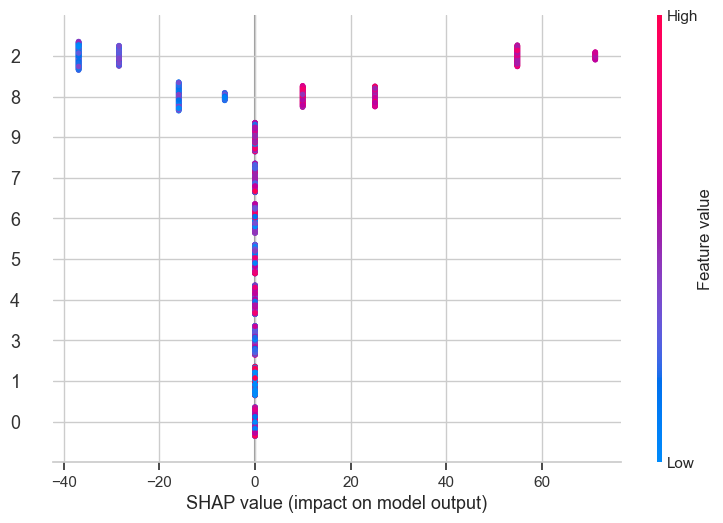

In [42]:
import shap 

explainer = shap.TreeExplainer(best_clf)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

Видим, что результаты аналогичны feature importance. Разделяющей силой обладает признак 2 и 8. Причём признаки монотонны. 

## Задача 4

Для данных из задачи 3 обучите случайный лес на 500 деревьев.

In [53]:
from sklearn.ensemble import RandomForestRegressor
from tqdm import tqdm

rf = RandomForestRegressor(n_estimators=500,max_depth=3)

rf.fit(X_train, y_train)

estimators = rf.estimators_

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Постройте график зависимости ошибки модели в зависимости от количества деревьев для обучающей и валидационной выборок.

*Замечание.* Не нужно заново обучать лес каждый раз. Используйте у *обученной* модели поле `estimators_`, это список из объектов класса `DecisionTreeRegressor`. Обратите внимание, что это приватное поле объекта, и менять его очень плохо, за такое баллы будут снижаться.

100%|██████████| 49/49 [00:01<00:00, 29.40it/s]


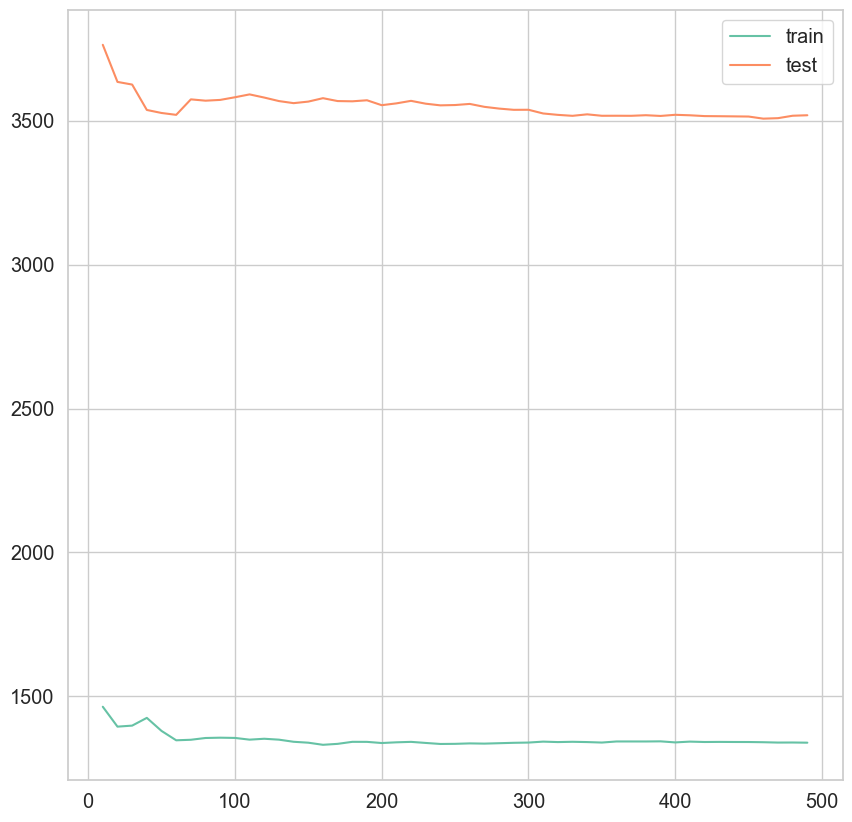

In [55]:
MSE_train = []
MSE_test = []

for i in tqdm(range(10,500,10)):
    rf.estimators_ = estimators[0:i]
    MSE_train.append(mean_squared_error(rf.predict(X_train), y_train))
    MSE_test.append(mean_squared_error(rf.predict(X_test), y_test))

plt.figure(figsize=(10,10))
plt.plot(range(10,500,10),MSE_train,label='train')
plt.plot(range(10,500,10),MSE_test,label='test')
plt.legend()

Для леса с максимальным количеством деревьев визуализируйте
важность признаков, используя поле `feature_importances_`. 

<BarContainer object of 10 artists>

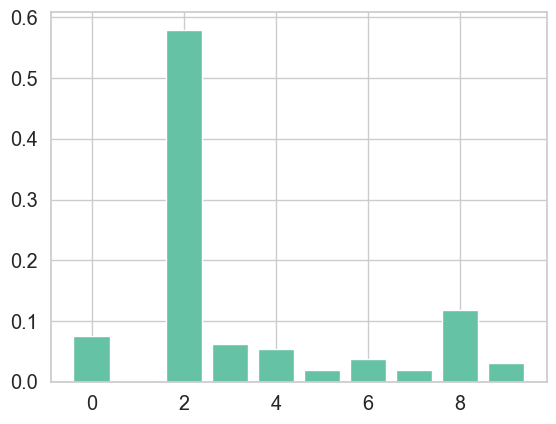

In [59]:
plt.bar(range(10),rf.feature_importances_)

Сделайте выводы.

**Вывод:** Модель также выделила прочие признаки при классификации. Таким образом достигает лучших результатов чем дерево

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


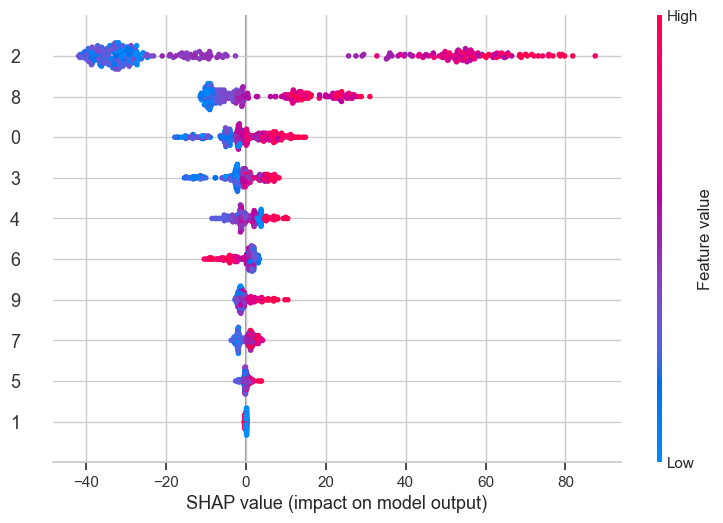

In [60]:
import shap 

explainer = shap.TreeExplainer(rf)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

Shap-плот демонстирует лучшую работу модели с распределением призанка. Появляется разделяющая сила у ранее неиспользованных признаков